In [1]:
from pipeline import t_stringColumnsToList
from pipeline import t_listToOneHot
from pipeline import t_catToOneHot, t_numTransform
from model import SplitTrainTest as split
from model import metrics
from model import linearRegression as lr
from model import curves

from language import tf_idf
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
import interview_utility as ut
from sklearn.pipeline import Pipeline, FeatureUnion
from pipeline import t_listToOneHot

r_recipes = pd.read_csv('/home/svetik/Notebooks/interview/food-com/r_recipes.csv')

print(r_recipes.columns)
print(r_recipes.head())
r_recipes['steps'] = r_recipes['steps'].apply(lambda x : x.replace("'", '').
                                                 replace('[', '').
                                                 replace(']',''))
                                                 #.
                                                 #split(', '))
print(r_recipes['steps'].values[0])

print(tf_idf.rank_words(r_recipes, 'steps', ngram_range = (2,3), numOfNgrams = 50))

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'Unnamed: 12'],
      dtype='object')
                              name      id  minutes  contributor_id  \
0          beat this  banana bread   75452       70           15892   
1      berry  good sandwich spread  109439        5           49168   
2    better than sex  strawberries   42198     1460           41531   
3  better then bush s  baked beans   67547     2970           85627   
4       boat house  collard greens  107517      525          137696   

    submitted                                               tags  \
0  2003-11-04  ['weeknight', 'time-to-make', 'course', 'main-...   
1  2005-01-25  ['15-minutes-or-less', 'time-to-make', 'course...   
2  2002-10-03  ['weeknight', 'time-to-make', 'course', 'main-...   
3  2003-07-26  ['weeknight', 'time-to-make', 'course', 'main-...   
4  2005-01-03  ['time-to-make'

In [2]:
r_recipes_len = r_recipes.shape[0]
output = pd.DataFrame([])
for row in range(0, r_recipes_len):
    a = pd.DataFrame(r_recipes.steps.apply(lambda x: x.replace("'", '').split(',')).loc[row]).T
    output = output.append(a)

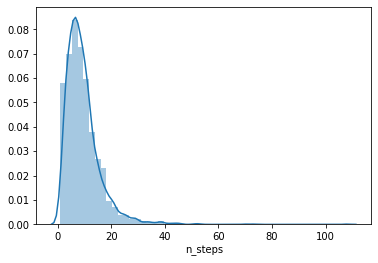

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(r_recipes.n_steps)

In [4]:

output_limited = output.loc[:,:20]
output_width = output_limited.shape[1]

output_limited = output_limited.fillna('0')# = output_limited[output_limited == np.nan]
output_limited.index = range(0,3008)

In [5]:
newVoc = tf_idf.define_new_voc(['abov', 'afterward', 'alon', 'alreadi', 'alway', 
                                'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 
                                'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 
                                'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 
                                'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 
                                'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'minut',
                                'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 
                                'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 
                                'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 
                                'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 
                                'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 
                                'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv','anywh', 'el', 
                                'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh', 'f'])
main_words = []
for col in range(0,output_width):
    print(col)
    main_words.append(list(tf_idf.rank_words(output_limited, col, ngram_range = (1,1), numOfNgrams = 5, stop_words = newVoc).term.values))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

for col in range(0, output_width):
    cv = CountVectorizer(analyzer=lambda x: x)
    output_limited2 = output_limited.iloc[:][col].apply(lambda x : x.split(' '))
    test = cv.fit_transform(output_limited2.to_list())
    test_columns = [x for x in cv.get_feature_names()]

    X_onehotencoded = pd.DataFrame(test.toarray(), columns = test_columns)
    a = list(set(list(X_onehotencoded.columns)).intersection(set(main_words[col])))

    output_limited = output_limited.join(X_onehotencoded[a], rsuffix = "_"+str(col) + "step")

In [7]:
output_limited[a].sum()

serve       61
add        397
minutes    152
cook        81
stir       120
dtype: int64

In [29]:
output_limited_columns = list(output_limited.columns)
for i in range(0,21):
    output_limited_columns.remove(i)

In [30]:
output_limited_columns

['mix',
 'preheat',
 'oven',
 'ingredients',
 'large',
 'add',
 'heat',
 'mix_1step',
 'ingredients_1step',
 'combine',
 'add_2step',
 'sugar',
 'mix_2step',
 'minutes',
 'bowl',
 'add_3step',
 'salt',
 'heat_3step',
 'mix_3step',
 'minutes_3step',
 'add_4step',
 'salt_4step',
 'mix_4step',
 'minutes_4step',
 'stir',
 'add_5step',
 'salt_5step',
 'mix_5step',
 'minutes_5step',
 'stir_5step',
 'add_6step',
 'salt_6step',
 'heat_6step',
 'mix_6step',
 'minutes_6step',
 'add_7step',
 'salt_7step',
 'heat_7step',
 'minutes_7step',
 'stir_7step',
 'add_8step',
 'heat_8step',
 'mix_8step',
 'minutes_8step',
 'stir_8step',
 'add_9step',
 'heat_9step',
 'mix_9step',
 'minutes_9step',
 'stir_9step',
 'add_10step',
 'salt_10step',
 'heat_10step',
 'minutes_10step',
 'stir_10step',
 'serve',
 'add_11step',
 'heat_11step',
 'minutes_11step',
 'cook',
 'bake',
 'serve_12step',
 'add_12step',
 'minutes_12step',
 'stir_12step',
 'add_13step',
 'heat_13step',
 'minutes_13step',
 'cook_13step',
 'stir_

In [44]:
r_recipes = r_recipes[['id']].join(output_limited[output_limited_columns])

In [36]:
interaction_df = pd.read_csv('/home/svetik/Notebooks/food-com/interactions_train.csv')
interaction_rating_df = interaction_df.groupby(['recipe_id']).mean()['rating']
#r_recipes.join(interaction_rating_df, on = 'id', how = 'inner')

KeyError: "None of [Index(['recipe_id', 'rating'], dtype='object', name='recipe_id')] are in the [index]"

In [46]:
interaction_rating_df = pd.DataFrame(interaction_rating_df)
interaction_rating_df.index.rename('recipe_id')
#interaction_rating_df.columns = ['id', 'rating']
#r_recipes.join(interaction_rating_df, on = 'id', how = 'inner')

Int64Index([    38,     40,     45,     46,     49,     52,     53,     58,
                59,     62,
            ...
            536401, 536411, 536643, 536679, 536726, 536729, 536990, 537175,
            537319, 537458],
           dtype='int64', name='recipe_id', length=160901)

In [49]:
r_r = r_recipes.join(interaction_rating_df, on = 'id', how = 'inner')

In [51]:
r_r.index = r_r.id

In [52]:
r_r

,id,mix,preheat,oven,ingredients,large,add,heat,mix_1step,ingredients_1step,...,add_19step,sauce,heat_19step,minutes_19step,serve_20step,add_20step,minutes_20step,cook_20step,stir_20step,rating
id,,,,,,,,,,,,,,,,,,,,,
75452,75452,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.250000
42198,42198,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.666667
67547,67547,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.666667
39959,39959,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
63986,63986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.882353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232507,232507,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
178276,178276,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
60583,60583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000


In [56]:
r_r_columns = list(r_r.columns)
r_r_columns.remove('id')
r_r = r_r[r_r_columns]

In [57]:
r_r['rating'] = r_r['rating'].apply(lambda x: round(x))

/home/svetik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
r_r['rating'].value_counts()

5    1197
4     617
3      87
2      47
0      32
1       2
Name: rating, dtype: int64

In [62]:
from model import SplitTrainTest as stt

[X_train, X_test, y_train, y_test] = stt.stratified_split(r_r, r_r['rating'], 'rating')


In [45]:
r_recipes.columns

Index(['id', 'mix', 'preheat', 'oven', 'ingredients', 'large', 'add', 'heat',
       'mix_1step', 'ingredients_1step',
       ...
       'serve_19step', 'add_19step', 'sauce', 'heat_19step', 'minutes_19step',
       'serve_20step', 'add_20step', 'minutes_20step', 'cook_20step',
       'stir_20step'],
      dtype='object', length=106)

In [10]:
sequences = []
for row in range(0, 3008):
    process = ""
    for col in ['mix','preheat', 'oven','ingredients','large','add','heat','mix_1step','ingredients_1step', 'combine','add_2step','sugar','mix_2step','minutes','bowl','add_3step', 'salt','heat_3step','mix_3step','minutes_3step','add_4step','salt_4step', 'mix_4step','minutes_4step','stir','add_5step','salt_5step','mix_5step', 'minutes_5step','stir_5step','add_6step','salt_6step','heat_6step', 'mix_6step','minutes_6step','add_7step','salt_7step','heat_7step', 'minutes_7step','stir_7step','add_8step','heat_8step','mix_8step', 'minutes_8step','stir_8step','add_9step','heat_9step','mix_9step', 'minutes_9step','stir_9step','add_10step','salt_10step','heat_10step', 'minutes_10step','stir_10step','serve','add_11step','heat_11step', 'minutes_11step','cook','bake','serve_12step','add_12step', 'minutes_12step','stir_12step','add_13step','heat_13step', 'minutes_13step','cook_13step','stir_13step','serve_14step','add_14step', 'mixture','remove','minutes_14step','add_15step','salt_15step', 'heat_15step','minutes_15step','stir_15step','serve_16step','add_16step', 'minutes_16step','stir_16step','cover','add_17step','salt_17step', 'heat_17step','minutes_17step','stir_17step','serve_18step','add_18step', 'mixture_18step','cheese','minutes_18step','serve_19step','add_19step', 'sauce','heat_19step','minutes_19step','serve_20step','add_20step', 'minutes_20step','cook_20step','stir_20step']:   
        val = output_limited.iloc[row][col] 
        if(val == 1):
            process += ' ' + str(col)
    sequences.append([process])
        #print(str(col) + str(" " + str(output_limited.iloc[:][col].sum())))

In [242]:
 pd.DataFrame(sequences)

,0
0,preheat oven sugar add_3step bake_13step
1,stir
2,mix_1step add_2step
3,add_6step stir_7step bake_8step add_14step ba...
4,add add_4step add_13step
...,...
3003,preheat oven salt_6step add_7step add_8step s...
3004,bake_7step
3005,preheat oven sugar add_4step add_7step
3006,oven add add_5step cook_7step add_11step cook...


In [11]:
sequences_df = pd.DataFrame(sequences)
sequences_df.columns = ['sequences']
#sequences_df

tf_idf.rank_words(sequences_df,  'sequences', ngram_range = (3,20))

,term,rank
14647,mix ingredients large,8.671938
18745,preheat oven mix_1step,8.352648
18356,preheat oven bowl,8.338832
14579,mix ingredients add,7.440073
18861,preheat oven mix_2step,7.383860
813,add mix_1step ingredients_1step,5.992773
14722,mix ingredients mix_3step,4.523052
14677,mix ingredients minutes_3step,4.340146
7,add add_2step add_3step,4.257160
15101,mix_1step ingredients_1step minutes,4.221179


In [14]:
print(tf_idf.rank_words(sequences_df,  'sequences', ngram_range = (3,20), numOfNgrams = 50))

                                           term      rank
14647                     mix ingredients large  8.671938
18745                    preheat oven mix_1step  8.352648
18356                         preheat oven bowl  8.338832
14579                       mix ingredients add  7.440073
18861                    preheat oven mix_2step  7.383860
813             add mix_1step ingredients_1step  5.992773
14722                 mix ingredients mix_3step  4.523052
14677             mix ingredients minutes_3step  4.340146
7                       add add_2step add_3step  4.257160
15101       mix_1step ingredients_1step minutes  4.221179
18580            preheat oven ingredients_1step  4.213794
18740                preheat oven minutes_9step  4.068707
18446                      preheat oven combine  3.930649
10397                       large add add_2step  3.863010
14673                   mix ingredients minutes  3.739130
19161                        preheat oven sugar  3.640043
18687         

In [145]:
output_limited['mix'].sum()

0

In [113]:
output_limited.join(X_onehotencoded[a], rsuffix = 'last')

,0,1,2,3,4,5,6,7,8,9,...,bake_19 steps,cook_19 steps,stir_20 steps,add_20 steps,bake_20 steps,cook_20 steps,stirlast,addlast,bakelast,cooklast
0,preheat oven to 350 degrees,"butter two 9x5"" loaf pans",cream the sugar and the butter until light an...,add the bananas,eggs,lemon juice,orange rind,beat until blended uniformly,be patient,and beat until the banana lumps are gone,...,0,0,0,0,0,0,0,0,0,0
0,in medium size bowl,coarsely mash cranberry sauce,stir in sour cream and horseradish until well...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,crush vanilla wafers into fine crumbs and line...,mix butter or margarine and sugar,add beaten eggs,spread the mixture over the wafer crumbs,crush strawberries and spread over sugar,egg,and butter mixture,cover strawberries with whipped cream,sprinkle with chopped nuts,chill 24 hours,...,0,0,0,0,0,0,0,0,0,0
0,in a very large sauce pan cover the beans and ...,bring to a boil,cover,and let sit for 1 1 / 2 hours,preheat oven to 350 degrees f,"""drain and pour beans into a 9x11 pan""",add the rest over the ingredients,stir,and bake until all the water has evaporated,about 3 hours,...,0,0,0,0,0,0,0,0,0,0
0,put prepared greens in large pot,add water,bring to a boil,and boil for one hour,add sugar,molasses,hot sauce,whiskey,and ham hock,bring to a boil again,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,preheat the oven to 350 degrees,grease a 12-cup muffin tin with butter and se...,in a large mixing bowl,whisk together the flour,sugar,baking powder,salt and baking soda,add the butter and rub it into the flour with...,add the buttermilk and stir till the dough is...,spoon the mixture into the prepared muffin ti...,...,0,0,0,0,0,0,0,0,0,0
0,sift dry ingredients together,dissolve yeast in water,add buttermilk and add in sifted ingredients ...,"knead 20 times and roll out 1 / 4"" thick","cut with biscuit cutter or 1"" drinking glass",butter biscuits with brush and stack in twos,let rise for 2 hours,bake at 425 degrees for 10 to 12 minutes,or until brown,0,...,0,0,0,0,0,0,0,0,0,0
0,preheat oven to 350,"grease with pam either 2-8"" loaf pans or a bu...",lightly sprinkle with cinnamon sugar for an a...,take a lg,mixing bowl and add the first 7 ingredients,"""mix with an electric hand mixer or by hand i...",just until blended,next add flour,salt,and b,...,0,0,0,0,0,0,0,0,0,0
0,combine all meat in a large dutch oven,add enough water to cover the meat,bring to a boil and cook meat until tender,take the meat out of the liquid,remove any bones and grind meat,add the potatoes,tomatoes and onions to the liquid in the dutc...,cook,stirring occasionally,until the potatoes begin to fall apart,...,0,0,0,0,0,0,0,0,0,0


In [122]:
output_limited['mix'].sum()

0

In [116]:
y

NameError: name 'y' is not defined

In [70]:
output_limited2.iloc[0]

['preheat', 'oven', 'to', '350', 'degrees']

In [55]:
X_onehotencoded.shape

(3008, 1984)

In [53]:
output_limited.iloc[:][0]

0                          preheat oven to 350 degrees
0                                 in medium size bowl 
0    crush vanilla wafers into fine crumbs and line...
0    in a very large sauce pan cover the beans and ...
0                     put prepared greens in large pot
                           ...                        
0                      preheat the oven to 350 degrees
0                        sift dry ingredients together
0                                  preheat oven to 350
0               combine all meat in a large dutch oven
0    saute onion in butter in a large saucepan unti...
Name: 0, Length: 3008, dtype: object

In [41]:
cv.get_feature_names()

['',
 '0',
 '30',
 '350',
 '45',
 '55',
 '9x5"',
 'add',
 'and',
 'are',
 'away',
 'bake',
 'banana',
 'bananas',
 'batter',
 'be',
 'beat',
 'before',
 'begin',
 'blended',
 'butter',
 'cool',
 'cream',
 'degrees',
 'dry',
 'edges',
 'eggs',
 'firm',
 'fold',
 'for',
 'freezes',
 'from',
 'gone',
 'in',
 'ingredients',
 'into',
 'juice',
 'lemon',
 'light',
 'lightly',
 'loaf',
 'loaves',
 'lumps',
 'middle',
 'minutes',
 'mixture',
 'on',
 'orange',
 'oven',
 'pans',
 'patient',
 'pour',
 'preheat',
 'prepared',
 'pull',
 'racks',
 'removing',
 'rind',
 'sift',
 'sugar',
 'the',
 'thoroughly',
 'to',
 'together',
 'two',
 'uniformly',
 'until',
 'well',
 'whipped']

In [31]:
output_limited.iloc[0]

0                           preheat oven to 350 degrees
1                             butter two 9x5" loaf pans
2      cream the sugar and the butter until light an...
3                                      add the bananas 
4                                                 eggs 
5                                          lemon juice 
6                                           orange rind
7                          beat until blended uniformly
8                                           be patient 
9              and beat until the banana lumps are gone
10                    sift the dry ingredients together
11     fold lightly and thoroughly into the banana m...
12              pour the batter into prepared loaf pans
13                           bake for 45 to 55 minutes 
14     until the loaves are firm in the middle and t...
15     cool the loaves on racks for 30 minutes befor...
16                                         freezes well
17                                              

In [ ]:
rowsOutputLimited = output_limited.shape[0]
process = pd.DataFrame([])

for row, step in zip(range(0, rowsOutputLimited):
    